# Data Analysis Exercise
## Quantum Energy Partners
#### Data Management Associate

### Michele Del Zoppo
#### Created: 11/16/2021

TESTING DASH:
https://dash.plotly.com/interactive-graphing


Pandas version> 1.3.4


In [1]:
# import pandas for initial exploration of dataset
import pandas as pd
print(pd.__version__) # print version in case something breaks later on

1.3.4


In [2]:
# Import the data as a df simply with read_csv from pandas package
df = pd.read_csv('AnalysisData.csv')

In [3]:
# simple check on the data avaiable
from IPython.display import display, HTML #import HTML funcionality for df display to show off all columns and rows if needed
display(HTML(df.head().to_html()))
df.shape

,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
0,-102.415082,32.196651,-102.414886,32.196766,OVV,9/30/2017,WOLFCAMP B,9925.0,2061.0,49.0,275.089,275.089,9.258,258.263,6818.863,439.838,22821.2075,0.056,4150.9728,0.426,0.011,3.1119,0.169,0.257,0.943,5.5592,325341.6875,1
1,-102.358481,32.132822,-102.358359,32.132904,OVV,10/7/2017,SPRABERRY LOWER SHALE,9478.0,2042.0,48.0,300.346,300.346,3.120,231.585,6149.570,NaN,30333.5230,0.055,2927.7631,0.319,0.005,2.8506,0.227,0.144,0.941,5.2283,211278.4063,2
2,-102.402982,32.119352,-102.402824,32.119379,OVV,10/7/2017,SPRABERRY LOWER SHALE,9295.0,2145.0,NaN,299.140,299.140,228.466,228.466,5917.984,NaN,16238.1090,0.047,2230.7591,0.445,0.006,1.9771,0.173,0.177,0.944,5.2176,201117.6094,3
3,-102.373553,32.125898,-102.373553,32.125898,OVV,8/11/2017,WOLFCAMP A,9894.0,1995.0,NaN,274.886,274.886,249.005,249.005,6560.600,NaN,24069.5400,0.048,3267.3561,0.311,0.003,2.5054,0.166,0.338,0.941,5.3567,297255.6250,4
4,-102.437947,32.451652,-102.437947,32.451652,OVV,8/16/2017,WOLFCAMP B,10403.0,2007.0,49.0,291.223,291.223,219.828,219.828,6809.605,442.147,24158.2750,0.057,4188.9816,0.386,0.009,3.0660,0.162,0.280,0.941,5.6994,240883.1875,5


(6098, 28)

In [4]:
# changing Completion Date type to proper timestamp format
df['CompletionDate'] = pd.to_datetime(df['CompletionDate'], format='%m/%d/%Y')
# setting string data as categorical to help with visualization
from pandas.api.types import CategoricalDtype
# set ordered categorical data for easier plotting later on
cat_type = CategoricalDtype(categories=['WOLFCAMP B', 'SPRABERRY LOWER SHALE', 'WOLFCAMP A', 'WOLFCAMP C', 'DEAN', 'SPRABERRY LOWER', 'SPRABERRY MIDDLE', 'WOLFCAMP D', 'SPRABERRY UPPER'], ordered=True)

df['Reservoir'] = df['Reservoir'].astype(cat_type)
df['Operator'] = df['Operator'].astype('category')

In [5]:
#checking automated data types from csv load to spot any wrong/superficial interpretation
types_list = df.dtypes.to_frame('dtypes').reset_index()
display(types_list)
# get list of each dtype variables
types_list_flt = list(types_list[types_list['dtypes'] == 'float64']['index'])
types_list_cat = list(types_list[types_list['dtypes'] == 'category']['index'])
types_list_dt = list(types_list[types_list['dtypes'] == 'datetime64[ns]']['index'])

,index,dtypes
0,SurfaceLongitude,float64
1,SurfaceLatitude,float64
2,BottomHoleLongitude,float64
3,BottomHoleLatitude,float64
4,Operator,category
5,CompletionDate,datetime64[ns]
6,Reservoir,category
7,LateralLength_FT,float64
8,ProppantIntensity_LBSPerFT,float64
9,FluidIntensity_BBLPerFT,float64


In [6]:
# let's check if catergorical data have any odd value
for i in types_list_cat:
    print(i,':')
    display(list(df[i].unique()))

Operator :


['OVV',
 'COP',
 'OXY',
 'FANG',
 'SABLE',
 'APA',
 'PXD',
 'ENDVR',
 'SURGE',
 'GUIDON',
 'LARIO',
 'CVX',
 'HIBERNIA',
 'FIREBIRD',
 'ELEMENT',
 'SUMMIT',
 'LPI',
 'DISCOVERY',
 'CPE',
 'TRACKER',
 'BLACK SWAN',
 'SM',
 'ESTE',
 'CHOLLA',
 'CRWNQST',
 'XOM',
 'SABALO',
 'HUNT',
 'MURCHISON',
 'BAYSWATER',
 'DBLPOINT',
 'RELENTLESS',
 'PRIME',
 'CAMBRIAN',
 'BTA',
 'QEP',
 'HANNATHON',
 'HENRY',
 'SEQUITUR',
 'DRIFTWOOD',
 'LGCY',
 'FASKEN',
 'TRPL CRWN',
 'FLEUR DE LIS',
 'QUIEN SABE',
 'RP',
 'EOG',
 'INDEPENDENCE',
 'TRP',
 'GRENADIER',
 'JO MILL',
 'PETROLEGACY',
 'LAKE CRYSTAL',
 'KEM',
 'BIRCH',
 'RELIANCE',
 'DEEP ROCK',
 '3-T',
 'HEADINGTON',
 'BIG STAR',
 'COLGATE',
 'PIEDRA',
 'RIDGELINE',
 'EPE',
 'ZARVONA']

Reservoir :


['WOLFCAMP B',
 'SPRABERRY LOWER SHALE',
 'WOLFCAMP A',
 'WOLFCAMP C',
 'DEAN',
 'SPRABERRY LOWER',
 'SPRABERRY MIDDLE',
 'WOLFCAMP D',
 'SPRABERRY UPPER']

In [7]:
df.isna().sum()

SurfaceLongitude                       0
SurfaceLatitude                        0
BottomHoleLongitude                   75
BottomHoleLatitude                    75
Operator                               0
CompletionDate                         0
Reservoir                              0
LateralLength_FT                       2
ProppantIntensity_LBSPerFT           437
FluidIntensity_BBLPerFT              305
HzDistanceToNearestOffsetAtDrill     208
HzDistanceToNearestOffsetCurrent     208
VtDistanceToNearestOffsetCurrent     208
VtDistanceToNearestOffsetAtDrill     208
WellDepth                              1
ReservoirThickness                  3575
OilInPlace                            34
Porosity                               0
ReservoirPressure                     34
WaterSaturation                       34
StructureDerivative                  490
TotalOrganicCarbon                    63
ClayVolume                             0
CarbonateVolume                        0
Maturity        

In [8]:
# Check amount of empty data point and in which columns
# display(df.shape) # check dimension
na_df = ((df.isna().sum() / df.shape[0]) * 100).to_frame('% NA').reset_index() #% of missing data
na_df = na_df[na_df['% NA'] > 0].sort_values(by = '% NA')
na_df

,index,% NA
14,WellDepth,0.016399
7,LateralLength_FT,0.032798
25,TotalWellCost_USDMM,0.163988
19,WaterSaturation,0.557560
18,ReservoirPressure,0.557560
16,OilInPlace,0.557560
21,TotalOrganicCarbon,1.033126
2,BottomHoleLongitude,1.229911
3,BottomHoleLatitude,1.229911
11,HzDistanceToNearestOffsetCurrent,3.410954


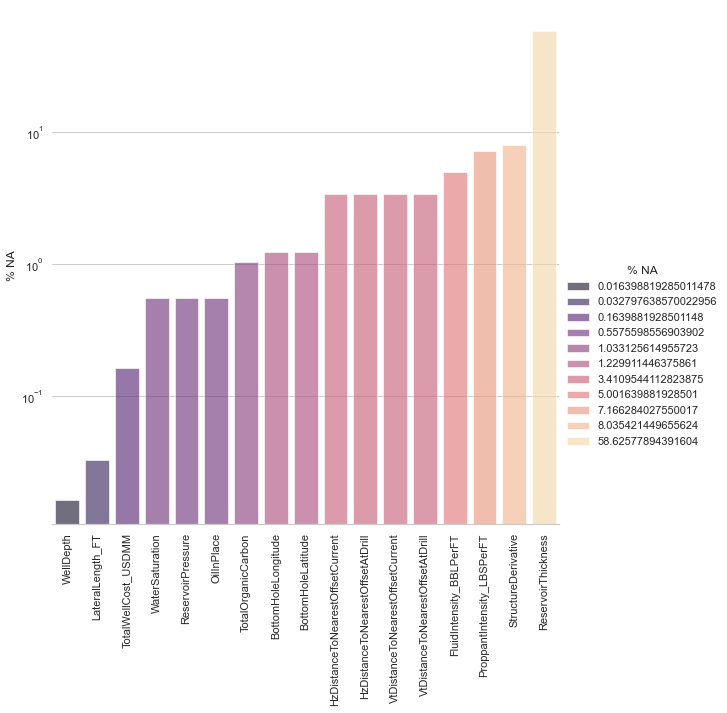

In [9]:
#  plotting na columns and % to find columns missing together (the more obvious ones!)
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=na_df, kind="bar",
    x="index", y="% NA", 
    palette="magma", alpha=.6, 
    hue= '% NA', height=8,
    dodge=False
)
g.set(yscale="log")
g.despine(left=True)
g.set_axis_labels("", "% NA")
plt.xticks(rotation=90)
plt.show()

In [10]:
# Let's look at the not recorded data
# na_df = /
for index, row in na_df.iterrows():
    if row['% NA'] < 10:
        if df[df[row['index']].isnull()].shape[0] < 10:
            print(row['index'])
            display(HTML(df[df[row['index']].isnull()].to_html()))
        else:
            print(row['index'])
            display(HTML(df[df[row['index']].isnull()].head(3).to_html()))

WellDepth


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
95,-102.217287,32.332579,-102.217263,32.332585,PXD,2015-02-01,WOLFCAMP B,4529.0,1727.0,38.0,NaN,NaN,NaN,NaN,NaN,421.248,12166.316,0.049,4127.6303,0.649,0.012,2.329,0.154,0.329,0.934,4.0727,126832.9922,96


LateralLength_FT


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
1510,-101.714333,32.399451,-101.703714,32.373259,RELENTLESS,2007-11-07,SPRABERRY UPPER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5074.341,NaN,6454.697,0.095,1801.9007,0.884,NaN,2.7251,0.168,0.102,0.57,NaN,130375.8594,1511
1511,-101.884867,32.437476,-101.877037,32.409294,RELENTLESS,2000-06-14,SPRABERRY UPPER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5074.341,NaN,6454.697,0.095,1801.9007,0.884,NaN,2.7251,0.168,0.102,0.57,NaN,130375.8594,1512


TotalWellCost_USDMM


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
103,-102.249993,32.491260,-102.249958,32.491249,CVX,1998-01-09,WOLFCAMP A,632.0,NaN,NaN,NaN,NaN,NaN,NaN,6587.318,NaN,11500.934,0.036,3139.7845,0.423,0.001,1.7816,0.158,0.382,0.909,NaN,9717.0000,104
104,-102.270645,32.437602,-102.270645,32.437602,CVX,2000-06-20,WOLFCAMP A,1379.0,NaN,NaN,NaN,NaN,NaN,NaN,6587.318,NaN,11500.934,0.036,3139.7845,0.423,0.001,1.7816,0.158,0.382,0.909,NaN,9717.0000,105
1510,-101.714333,32.399451,-101.703714,32.373259,RELENTLESS,2007-11-07,SPRABERRY UPPER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5074.341,NaN,6454.697,0.095,1801.9007,0.884,NaN,2.7251,0.168,0.102,0.570,NaN,130375.8594,1511


WaterSaturation


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
75,-102.393292,32.445475,-102.393789,32.445410,LARIO,2019-12-26,WOLFCAMP A,9815.0,NaN,47.0,651.522,651.522,34.192,34.192,6381.3920,NaN,NaN,0.073,NaN,NaN,0.017,NaN,0.277,0.175,0.722,5.5899,118874.0000,76
241,-101.641391,30.852176,-101.641391,30.852176,FANG,2018-10-31,WOLFCAMP B,10051.0,NaN,57.0,NaN,NaN,NaN,NaN,7021.8184,115.148,NaN,0.058,NaN,NaN,0.007,NaN,0.156,0.219,0.944,6.5736,213376.6094,242
410,-102.181107,32.805690,-102.181098,32.805710,PXD,2020-01-31,WOLFCAMP A,9781.0,2000.0,46.0,NaN,NaN,NaN,NaN,5730.0776,NaN,NaN,0.075,NaN,NaN,0.015,NaN,0.242,0.151,0.942,6.8164,158871.9219,411


ReservoirPressure


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
75,-102.393292,32.445475,-102.393789,32.445410,LARIO,2019-12-26,WOLFCAMP A,9815.0,NaN,47.0,651.522,651.522,34.192,34.192,6381.3920,NaN,NaN,0.073,NaN,NaN,0.017,NaN,0.277,0.175,0.722,5.5899,118874.0000,76
241,-101.641391,30.852176,-101.641391,30.852176,FANG,2018-10-31,WOLFCAMP B,10051.0,NaN,57.0,NaN,NaN,NaN,NaN,7021.8184,115.148,NaN,0.058,NaN,NaN,0.007,NaN,0.156,0.219,0.944,6.5736,213376.6094,242
410,-102.181107,32.805690,-102.181098,32.805710,PXD,2020-01-31,WOLFCAMP A,9781.0,2000.0,46.0,NaN,NaN,NaN,NaN,5730.0776,NaN,NaN,0.075,NaN,NaN,0.015,NaN,0.242,0.151,0.942,6.8164,158871.9219,411


OilInPlace


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
75,-102.393292,32.445475,-102.393789,32.445410,LARIO,2019-12-26,WOLFCAMP A,9815.0,NaN,47.0,651.522,651.522,34.192,34.192,6381.3920,NaN,NaN,0.073,NaN,NaN,0.017,NaN,0.277,0.175,0.722,5.5899,118874.0000,76
241,-101.641391,30.852176,-101.641391,30.852176,FANG,2018-10-31,WOLFCAMP B,10051.0,NaN,57.0,NaN,NaN,NaN,NaN,7021.8184,115.148,NaN,0.058,NaN,NaN,0.007,NaN,0.156,0.219,0.944,6.5736,213376.6094,242
410,-102.181107,32.805690,-102.181098,32.805710,PXD,2020-01-31,WOLFCAMP A,9781.0,2000.0,46.0,NaN,NaN,NaN,NaN,5730.0776,NaN,NaN,0.075,NaN,NaN,0.015,NaN,0.242,0.151,0.942,6.8164,158871.9219,411


TotalOrganicCarbon


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
75,-102.393292,32.445475,-102.393789,32.445410,LARIO,2019-12-26,WOLFCAMP A,9815.0,NaN,47.0,651.522,651.522,34.192,34.192,6381.3920,NaN,NaN,0.073,NaN,NaN,0.017,NaN,0.277,0.175,0.722,5.5899,118874.0000,76
241,-101.641391,30.852176,-101.641391,30.852176,FANG,2018-10-31,WOLFCAMP B,10051.0,NaN,57.0,NaN,NaN,NaN,NaN,7021.8184,115.148,NaN,0.058,NaN,NaN,0.007,NaN,0.156,0.219,0.944,6.5736,213376.6094,242
410,-102.181107,32.805690,-102.181098,32.805710,PXD,2020-01-31,WOLFCAMP A,9781.0,2000.0,46.0,NaN,NaN,NaN,NaN,5730.0776,NaN,NaN,0.075,NaN,NaN,0.015,NaN,0.242,0.151,0.942,6.8164,158871.9219,411


BottomHoleLongitude


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
221,-101.432580,32.743970,NaN,NaN,XOM,2017-10-04,WOLFCAMP B,10418.0,1698.0,59.0,101.945,101.945,39.540,39.540,5886.939,281.133,7813.3940,0.058,3941.6200,0.764,0.024,2.8455,0.174,0.256,0.806,6.0623,70394.3594,222
269,-101.403590,30.717314,NaN,NaN,CPE,2015-06-01,WOLFCAMP B,4966.0,1433.0,42.0,889.771,889.771,21.230,21.230,6934.539,118.859,6764.9820,0.035,4121.0154,0.344,0.002,2.5415,0.163,0.243,0.965,2.8580,88229.8100,270
271,-101.576282,30.975774,NaN,NaN,CPE,2015-06-03,WOLFCAMP B,4886.0,1534.0,45.0,841.173,841.173,14.337,14.337,6970.105,114.269,6316.6195,0.041,3833.6663,0.444,0.001,2.5682,0.169,0.208,0.966,2.8982,87223.3700,272


BottomHoleLatitude


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
221,-101.432580,32.743970,NaN,NaN,XOM,2017-10-04,WOLFCAMP B,10418.0,1698.0,59.0,101.945,101.945,39.540,39.540,5886.939,281.133,7813.3940,0.058,3941.6200,0.764,0.024,2.8455,0.174,0.256,0.806,6.0623,70394.3594,222
269,-101.403590,30.717314,NaN,NaN,CPE,2015-06-01,WOLFCAMP B,4966.0,1433.0,42.0,889.771,889.771,21.230,21.230,6934.539,118.859,6764.9820,0.035,4121.0154,0.344,0.002,2.5415,0.163,0.243,0.965,2.8580,88229.8100,270
271,-101.576282,30.975774,NaN,NaN,CPE,2015-06-03,WOLFCAMP B,4886.0,1534.0,45.0,841.173,841.173,14.337,14.337,6970.105,114.269,6316.6195,0.041,3833.6663,0.444,0.001,2.5682,0.169,0.208,0.966,2.8982,87223.3700,272


HzDistanceToNearestOffsetCurrent


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
11,-102.358687,32.188682,-102.358688,32.188904,OVV,2017-02-08,WOLFCAMP A,7732.0,1970.0,50.0,NaN,NaN,NaN,NaN,6460.0137,NaN,12304.380,0.047,3466.3091,0.593,0.019,2.2607,0.200,0.209,0.971,4.4975,477447.5938,12
22,-102.432484,32.142851,-102.431806,32.142760,OXY,2015-08-06,WOLFCAMP A,7578.0,NaN,NaN,NaN,NaN,NaN,NaN,5384.3390,NaN,10693.606,0.056,2979.3055,0.652,0.023,2.4147,0.218,0.112,0.760,4.6568,89813.7578,23
59,-102.363585,32.177230,-102.363124,32.177176,OXY,2017-09-08,WOLFCAMP B,9780.0,1780.0,52.0,NaN,NaN,NaN,NaN,6061.6011,476.804,16047.104,0.074,3468.5711,0.722,0.013,2.4825,0.228,0.189,0.938,6.6115,117376.0000,60


HzDistanceToNearestOffsetAtDrill


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
11,-102.358687,32.188682,-102.358688,32.188904,OVV,2017-02-08,WOLFCAMP A,7732.0,1970.0,50.0,NaN,NaN,NaN,NaN,6460.0137,NaN,12304.380,0.047,3466.3091,0.593,0.019,2.2607,0.200,0.209,0.971,4.4975,477447.5938,12
22,-102.432484,32.142851,-102.431806,32.142760,OXY,2015-08-06,WOLFCAMP A,7578.0,NaN,NaN,NaN,NaN,NaN,NaN,5384.3390,NaN,10693.606,0.056,2979.3055,0.652,0.023,2.4147,0.218,0.112,0.760,4.6568,89813.7578,23
59,-102.363585,32.177230,-102.363124,32.177176,OXY,2017-09-08,WOLFCAMP B,9780.0,1780.0,52.0,NaN,NaN,NaN,NaN,6061.6011,476.804,16047.104,0.074,3468.5711,0.722,0.013,2.4825,0.228,0.189,0.938,6.6115,117376.0000,60


VtDistanceToNearestOffsetCurrent


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
11,-102.358687,32.188682,-102.358688,32.188904,OVV,2017-02-08,WOLFCAMP A,7732.0,1970.0,50.0,NaN,NaN,NaN,NaN,6460.0137,NaN,12304.380,0.047,3466.3091,0.593,0.019,2.2607,0.200,0.209,0.971,4.4975,477447.5938,12
22,-102.432484,32.142851,-102.431806,32.142760,OXY,2015-08-06,WOLFCAMP A,7578.0,NaN,NaN,NaN,NaN,NaN,NaN,5384.3390,NaN,10693.606,0.056,2979.3055,0.652,0.023,2.4147,0.218,0.112,0.760,4.6568,89813.7578,23
59,-102.363585,32.177230,-102.363124,32.177176,OXY,2017-09-08,WOLFCAMP B,9780.0,1780.0,52.0,NaN,NaN,NaN,NaN,6061.6011,476.804,16047.104,0.074,3468.5711,0.722,0.013,2.4825,0.228,0.189,0.938,6.6115,117376.0000,60


VtDistanceToNearestOffsetAtDrill


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
11,-102.358687,32.188682,-102.358688,32.188904,OVV,2017-02-08,WOLFCAMP A,7732.0,1970.0,50.0,NaN,NaN,NaN,NaN,6460.0137,NaN,12304.380,0.047,3466.3091,0.593,0.019,2.2607,0.200,0.209,0.971,4.4975,477447.5938,12
22,-102.432484,32.142851,-102.431806,32.142760,OXY,2015-08-06,WOLFCAMP A,7578.0,NaN,NaN,NaN,NaN,NaN,NaN,5384.3390,NaN,10693.606,0.056,2979.3055,0.652,0.023,2.4147,0.218,0.112,0.760,4.6568,89813.7578,23
59,-102.363585,32.177230,-102.363124,32.177176,OXY,2017-09-08,WOLFCAMP B,9780.0,1780.0,52.0,NaN,NaN,NaN,NaN,6061.6011,476.804,16047.104,0.074,3468.5711,0.722,0.013,2.4825,0.228,0.189,0.938,6.6115,117376.0000,60


FluidIntensity_BBLPerFT


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
2,-102.402982,32.119352,-102.402824,32.119379,OVV,2017-10-07,SPRABERRY LOWER SHALE,9295.0,2145.0,NaN,299.140,299.140,228.466,228.466,5917.984,NaN,16238.109,0.047,2230.7591,0.445,0.006,1.9771,0.173,0.177,0.944,5.2176,201117.6094,3
3,-102.373553,32.125898,-102.373553,32.125898,OVV,2017-08-11,WOLFCAMP A,9894.0,1995.0,NaN,274.886,274.886,249.005,249.005,6560.600,NaN,24069.540,0.048,3267.3561,0.311,0.003,2.5054,0.166,0.338,0.941,5.3567,297255.6250,4
12,-102.304793,32.426077,-102.304860,32.426525,OVV,2017-02-16,SPRABERRY LOWER SHALE,7703.0,NaN,NaN,13.751,13.751,269.108,269.108,6222.666,NaN,28108.395,0.055,2927.3818,0.408,0.022,2.6771,0.231,0.155,0.972,4.5631,116930.8984,13


ProppantIntensity_LBSPerFT


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
12,-102.304793,32.426077,-102.304860,32.426525,OVV,2017-02-16,SPRABERRY LOWER SHALE,7703.0,NaN,NaN,13.751,13.751,269.108,269.108,6222.666,NaN,28108.395,0.055,2927.3818,0.408,0.022,2.6771,0.231,0.155,0.972,4.5631,116930.8984,13
22,-102.432484,32.142851,-102.431806,32.142760,OXY,2015-08-06,WOLFCAMP A,7578.0,NaN,NaN,NaN,NaN,NaN,NaN,5384.339,NaN,10693.606,0.056,2979.3055,0.652,0.023,2.4147,0.218,0.112,0.760,4.6568,89813.7578,23
47,-102.377718,32.172319,-102.377718,32.172319,COP,2012-07-21,WOLFCAMP B,2103.0,NaN,38.0,2000.000,2000.000,500.000,500.000,6462.173,440.899,14816.076,0.043,4252.8181,0.633,0.023,2.1654,0.135,0.400,0.907,2.0376,46459.1328,48


StructureDerivative


,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID
14,-102.497491,32.498654,-102.496668,32.498908,OVV,2017-02-16,WOLFCAMP C,7607.0,1532.0,52.0,224.872,224.872,184.076,184.076,7098.551,NaN,5592.534,0.055,4511.2833,0.712,NaN,2.1080,0.224,0.197,0.971,4.0765,29439.9160,15
21,-102.396879,32.128340,-102.396426,32.128043,COP,2015-12-18,DEAN,4998.0,1487.0,48.0,9.775,9.775,262.848,262.848,6294.326,NaN,14962.577,0.057,3284.2381,0.662,NaN,2.2875,0.236,0.124,0.967,3.2310,92708.4141,22
23,-102.435284,32.153849,-102.435487,32.153594,FANG,2007-07-12,SPRABERRY LOWER,1961.0,215.0,NaN,2000.000,2000.000,500.000,500.000,4998.772,NaN,8210.541,0.072,2373.9962,0.799,NaN,2.4971,0.195,0.099,0.794,1.2697,14081.1104,24


# MAPS

https://datascience.quantecon.org/applications/maps.html

https://pypi.org/project/Shapely/

https://geopandas.org/en/stable/docs/user_guide/mapping.html

Scattergeo + Cloropeth
https://community.plotly.com/t/how-can-i-combine-choropleth-and-scatter-layer-in-a-plotly-map/29842/7

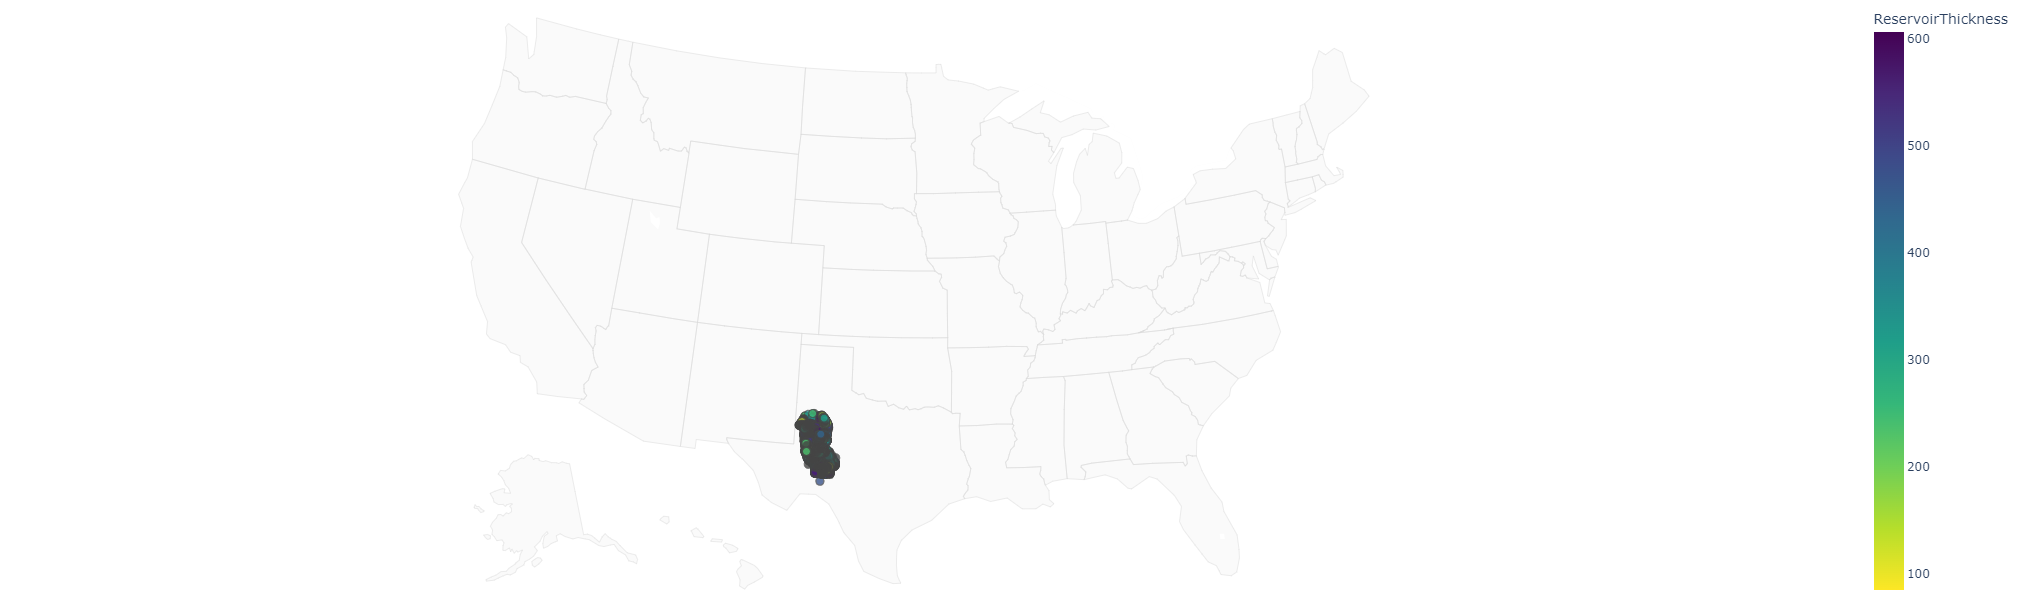

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


Exception in thread Thread-9:
Traceback (most recent call last):
  File "C:\Users\Michele\Anaconda3\envs\py3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\Michele\Anaconda3\envs\py3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Michele\Anaconda3\envs\py3\lib\site-packages\dash\dash.py", line 1437, in <lambda>
    def _serve_default_favicon():
  File "C:\Users\Michele\Anaconda3\envs\py3\lib\site-packages\dash\_watch.py", line 35, in watch
    walk()
  File "C:\Users\Michele\Anaconda3\envs\py3\lib\site-packages\dash\_watch.py", line 20, in walk
    info = os.stat(path)
FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\Michele\\Anaconda3\\envs\\py3\\lib\\site-packages\\dash_html_components\\__pycache__\\Datalist.cpython-38.pyc.c~'


In [16]:
# plotting on a MAP
import plotly.graph_objects as go #import gbraph object for plotting plotly

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['SurfaceLongitude'],
        lat = df['SurfaceLatitude'],
        text = df['Operator'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Viridis',
            color = df['ReservoirThickness'],
            cmin = df['ReservoirThickness'].min(),
            cmax = df['ReservoirThickness'].max(),
            colorbar_title="ReservoirThickness"
        )))

fig.update_geos(projection_type="orthographic")

fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0},
        title = 'whatever',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()
fig.write_html("map.html")


# USING DASH!

# import dash
# import dash_core_components as dcc
# import dash_html_components as html

# app = dash.Dash()
# app.layout = html.Div([
#     dcc.Graph(figure=fig)
# ])

# app.run_server(debug=True, use_reloader=False)

In [12]:
# Testing geopandas visualizations for well map
import geopandas as gpd
# set FIPS code for TEXAS
fips_tx = 48
# load state bonduaries from latest CENSUS data
state_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_state_5m.zip")
# load county bond. from latest CENSUS data
county_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_county_5m.zip")
# Load all TEXAS contunties
county_df = county_df.query("STATEFP == '48'") #Texas State
county_df.head()

C:\Users\Michele\Anaconda3\envs\py3\lib\site-packages\geopandas\_compat.py:50: UserWarning:

The installed version of PyGEOS is too old (0.6 installed, 0.8 required), and thus GeoPandas will not use PyGEOS.



,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
23,48,383,01383977,0500000US48383,48383,Reagan,06,3044049124,1792716,"POLYGON ((-101.77580 31.65132, -101.26712 31.6..."
24,48,497,01384034,0500000US48497,48497,Wise,06,2342363528,47038989,"POLYGON ((-97.91819 33.43387, -97.48707 33.433..."
51,48,127,01383849,0500000US48127,48127,Dimmit,06,3441795365,14576538,"POLYGON ((-100.11434 28.64812, -99.93594 28.64..."
57,48,129,01383850,0500000US48129,48129,Donley,06,2400623972,15954005,"POLYGON ((-101.08628 35.18214, -100.53898 35.1..."
58,48,461,01384016,0500000US48461,48461,Upton,06,3215010601,464309,"POLYGON ((-102.31805 31.65133, -102.28735 31.6..."


In [13]:
#  defince the 2 coordinates and zip together
df["WellHeadCoordinates"] = list(zip(df.SurfaceLongitude, df.SurfaceLatitude))
from shapely.geometry import Point #get method to create points on shapefiles
# create points on shapefile
df["WellHeadCoordinates"] = df["WellHeadCoordinates"].apply(Point) # 
# create geopandas datafarame with weel coordinates as geolocation geometry
gdf = gpd.GeoDataFrame(df, geometry="WellHeadCoordinates")
gdf.head()

,SurfaceLongitude,SurfaceLatitude,BottomHoleLongitude,BottomHoleLatitude,Operator,CompletionDate,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,...,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM,CumOil12Month,rowID,WellHeadCoordinates
0,-102.415082,32.196651,-102.414886,32.196766,OVV,2017-09-30,WOLFCAMP B,9925.0,2061.0,49.0,...,0.426,0.011,3.1119,0.169,0.257,0.943,5.5592,325341.6875,1,POINT (-102.41508 32.19665)
1,-102.358481,32.132822,-102.358359,32.132904,OVV,2017-10-07,SPRABERRY LOWER SHALE,9478.0,2042.0,48.0,...,0.319,0.005,2.8506,0.227,0.144,0.941,5.2283,211278.4063,2,POINT (-102.35848 32.13282)
2,-102.402982,32.119352,-102.402824,32.119379,OVV,2017-10-07,SPRABERRY LOWER SHALE,9295.0,2145.0,NaN,...,0.445,0.006,1.9771,0.173,0.177,0.944,5.2176,201117.6094,3,POINT (-102.40298 32.11935)
3,-102.373553,32.125898,-102.373553,32.125898,OVV,2017-08-11,WOLFCAMP A,9894.0,1995.0,NaN,...,0.311,0.003,2.5054,0.166,0.338,0.941,5.3567,297255.6250,4,POINT (-102.37355 32.12590)
4,-102.437947,32.451652,-102.437947,32.451652,OVV,2017-08-16,WOLFCAMP B,10403.0,2007.0,49.0,...,0.386,0.009,3.0660,0.162,0.280,0.941,5.6994,240883.1875,5,POINT (-102.43795 32.45165)


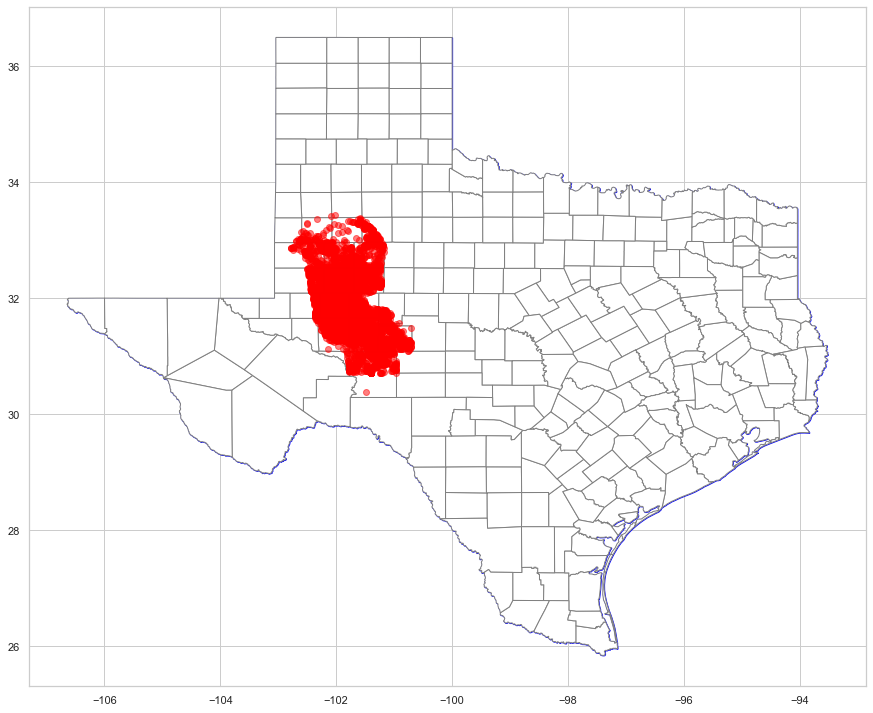

In [14]:
# set fig size
fig, gax = plt.subplots(figsize=(15, 15))
# plot Texas borders
state_df.query("NAME == 'Texas'").plot(ax=gax, edgecolor="blue", color="white")
# plot counties
county_df.plot(ax=gax, edgecolor="grey", color="white")
# plot scatter plo wells
gdf.plot(ax=gax, color='red', alpha = 0.5)

plt.show()



In [15]:
import geopandas as gpd

import folium
import mapclassify
import matplotlib

gdf.explore()

AttributeError: 'GeoDataFrame' object has no attribute 'explore'

https://www.kaggle.com/jrmistry/plotly-how-to-change-plot-data-using-dropdowns